In [1]:
import pandas as pd
import ast
import os
from pprint import pprint
import matplotlib.pyplot as plt
from auxiliar_func import *
from plot_func import *

# Importing the models
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

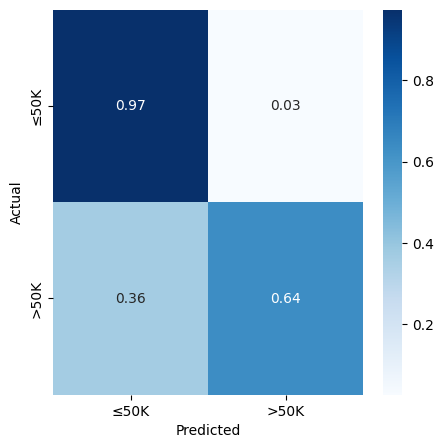

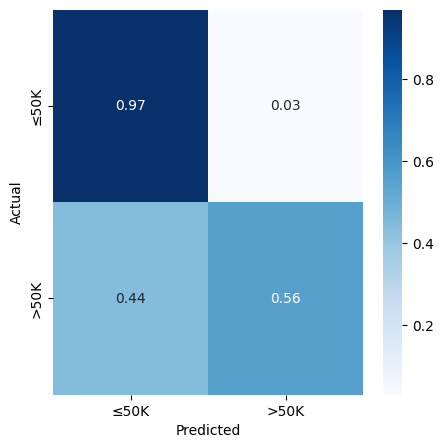

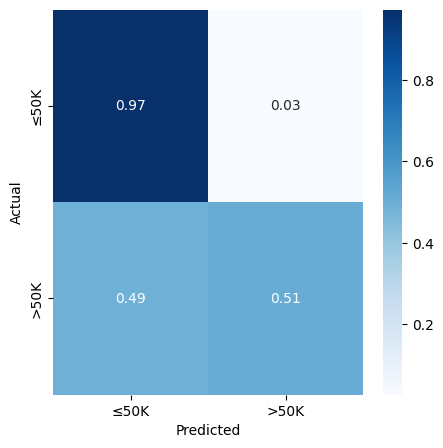

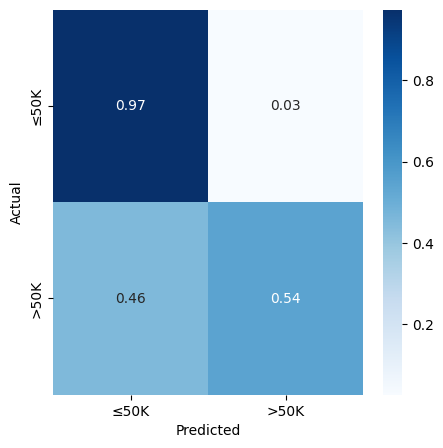

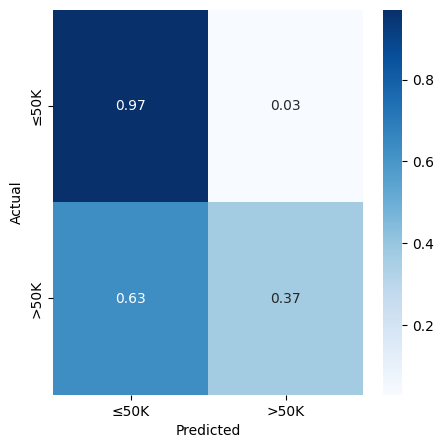

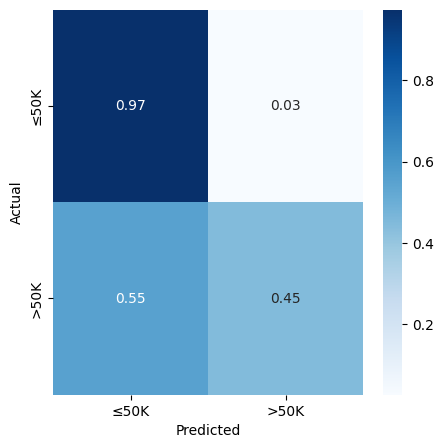

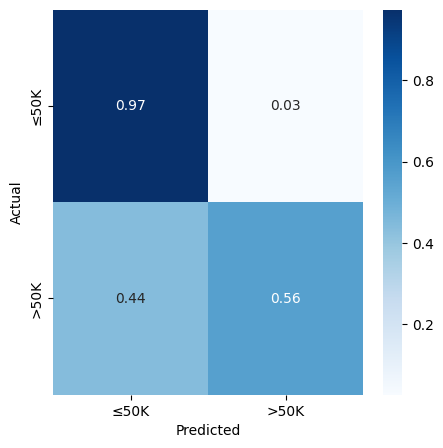

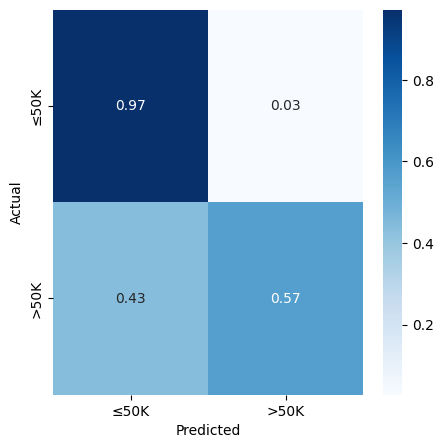

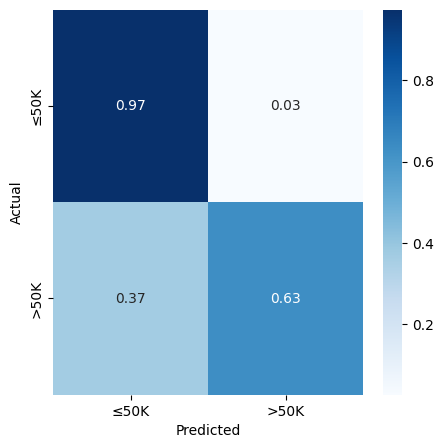

In [2]:
models = {
    'nb': GaussianNB,
    'lda': LDA,
    'qda': QDA,
    'knn': KNN,
    'logreg': LogisticRegression,
    'svm': LinearSVC,
    'rf': RandomForestClassifier,
    'xgb': XGBClassifier,
    'catboost': CatBoostClassifier,
}

df_tr = pd.read_csv('../train.csv')

# for xgboost
df_tr = df_tr.applymap(lambda x: x.replace('[', '').replace(']', '').replace('<', '') if isinstance(x, str) else x)

TARGET_METRIC = 'f1_macro'
SEED = 42
CV_FOLDS = 20

results = pd.DataFrame(columns=['model', 'accuracy', 'f1_macro', 'precision_macro', 'recall_macro'], dtype=float)
results.set_index('model', inplace=True)


for file in os.listdir('./results'):
    if file.endswith('.csv') and file.startswith('results_'):
        res = read_results('./results/'+file)
        prep_par, model_par = get_best_params('./results/'+file)
        mod_name = file.split('_')[1][:-4]
        model = models[mod_name](**model_par)
        score, y_pred, y_true = cross_validation(model, df_tr, prep_par, cv=CV_FOLDS, random_state=SEED, return_predict=True)

        results.loc[mod_name] = pd.Series(score)
        
        plot_conf_matrix(y_true, y_pred, './figures/conf_matrix_'+mod_name+'.pdf', show=False)
        

results = results.sort_values(by=TARGET_METRIC, ascending=False)

In [3]:
results.to_csv('./results/cv20_results.csv')
results.head(10)

,accuracy,f1_macro,precision_macro,recall_macro
model,,,,
catboost,0.953396,0.798782,0.804648,0.793495
xgb,0.952723,0.795346,0.801880,0.789454
rf,0.945370,0.777741,0.767179,0.789600
logreg,0.943372,0.774490,0.759316,0.792364
svm,0.945584,0.772998,0.768977,0.777387
knn,0.943988,0.758554,0.763405,0.754282
lda,0.938475,0.758384,0.741252,0.779148
qda,0.927627,0.739141,0.709827,0.782528
nb,0.910930,0.702070,0.670166,0.759043
